In [1]:
import pandas as pd
import numpy as np

In [2]:
# load data
df = pd.read_csv('../data/survey_results.csv', index_col=0)

In [3]:
#get an overview
df.head()

,Jeg jobber i...,Jeg jobber som...,Er klima ett av dine hovedområder innenfor journalistikk?,Hva er ditt kjønn?,I hvilken grad er du enig i dette sitatet når det gjelder norsk klimajournalistikk generelt?,Kan du begrunne svaret ditt over?,I hvilken grad stemmer dette overens med din oppfatning av produksjonen av klimasaker i din egen redaksjon?,Hva mener du er norsk presse sin hovedutfordring når det gjelder klimajournalistikk? _1,Hva mener du er norsk presse sin hovedutfordring når det gjelder klimajournalistikk? _2,Hva mener du er norsk presse sin hovedutfordring når det gjelder klimajournalistikk? _3,...,Hva mener du er norsk presse sin hovedutfordring når det gjelder klimajournalistikk? _7,Hva mener du er norsk presse sin hovedutfordring når det gjelder klimajournalistikk? _8,Hva mener du er norsk presse sin hovedutfordring når det gjelder klimajournalistikk? _9,Vennligst utdyp svaret ditt over og/eller legg til noe hvis du føler det mangler.,Hvem er oftest meningsbærerne i klimasaker fra din redaksjon?,Nye funn gjort av Faktisk.no og OsloMet viser at en stor del av klimasaker i norsk presse er meningsinnhold. Hva tror du er grunnen til dette?,Kjenner du til noen nyhetssaker fra din redaksjon som du mener er eksempler på spesielt gode klimasaker?,"Hvordan mener du klima kan være interessant og viktig på andre stoffområder (f.eks. kultur, sport, økonomi m.fl.)?",Hva mener du norsk presse bør gjøre hvis de vil bli bedre på klimajournalistikk?,Svartid
NR,,,,,,,,,,,,,,,,,,,,,
26617639,Lokalpresse,NaN,Nei,Kvinne,Helt enig,Jeg mener at klimajournalistikken i norske nyh...,NaN,Klimasaker får ikke klikk og blir ikke lest,Redaktører og reportasjeledere er ikke interes...,NaN,...,NaN,NaN,NaN,Klimajournalistikken blir for dramatisk og kon...,NaN,NaN,Ytterst få saker fra min redaksjon er eksemple...,Klima som tema kan absolutt kombineres med and...,Jeg mener at norsk presse bør angripe klima sl...,33 minutter 36 sekunder
26823171,Nasjonalpresse,Journalist,Nei,Mann,Litt enig,Det var ikke helsvart klimadekning i norske me...,I stor grad,Klimasaker får ikke klikk og blir ikke lest,Redaktører og reportasjeledere er ikke interes...,NaN,...,"Klimajournalistikk blir ofte ensidig, og det e...",NaN,NaN,Se svar ovenfor.,Forskere,"Meninger skaper debatt, debatt skaper trafikk,...","Ikke veldig mange, men en politisk sak som det...",Dette var en stort spørsmål som er vanskelig å...,Samme svar som ovenfor.,13 minutter 46 sekunder
26824575,Nasjonalpresse,Journalist,Ja,Mann,Helt enig,"Klima er abstrakt og stort, og vanskelig å fat...",I noe grad,Klimasaker får ikke klikk og blir ikke lest,NaN,NaN,...,NaN,NaN,NaN,"Samme som over, egentlig.",Forskere,"Komplisert tema som er lettere å mene noe om, ...",Nei,"Næringslivet påvirkes, og tilpasser seg, klima...",Gjøre det mer forbruker-sentrert. Folk er ikke...,14 minutter 27 sekunder
26835382,Nasjonalpresse,Redaktør,Nei,Kvinne,Litt enig,.,I noe grad,NaN,NaN,NaN,...,NaN,Journalisten selv er ikke interessert,NaN,.,Selskaper,NaN,.,.,.,4 minutter 52 sekunder
26859628,Nasjonalpresse,Journalist,Ja,Kvinne,Helt enig,"Jeg har selv vært en ivrig pådriver for bedre,...",I stor grad,NaN,Redaktører og reportasjeledere er ikke interes...,NaN,...,NaN,NaN,NaN,Jeg opplever at flere synes det er vanskelig å...,Klima- og miljøorganisasjoner,"Det er vanskelig å si, men det er flere politi...",Vi er et lite team på tre personer som jobber ...,"Det går inn i alle felt, feks skisport mtp at ...","Alle bør på kurs, og tenke mer klima fremover....",14 minutter 6 sekunder


In [12]:
# giving the column names new and shorter names
column_mapping = {
    'Jeg jobber i...': 'sp1',
    'Jeg jobber som...': 'sp2',
    'Er klima ett av dine hovedområder innenfor journalistikk? ': 'sp3',
    'Hva er ditt kjønn?':'sp4',
    'I hvilken grad er du enig i dette sitatet når det gjelder norsk klimajournalistikk generelt?':'sp5',
    'Kan du begrunne svaret ditt over?':'sp6',
    'I hvilken grad stemmer dette overens med din oppfatning av produksjonen av klimasaker i din egen redaksjon? ':'sp7',
    'Hva mener du er norsk presse sin hovedutfordring når det gjelder klimajournalistikk? _1':'sp8_1',
    'Hva mener du er norsk presse sin hovedutfordring når det gjelder klimajournalistikk? _2':'sp8_2',
    'Hva mener du er norsk presse sin hovedutfordring når det gjelder klimajournalistikk? _3':'sp8_3',
    'Hva mener du er norsk presse sin hovedutfordring når det gjelder klimajournalistikk? _4':'sp8_4',
    'Hva mener du er norsk presse sin hovedutfordring når det gjelder klimajournalistikk? _5':'sp8_5',
    'Hva mener du er norsk presse sin hovedutfordring når det gjelder klimajournalistikk? _6':'sp8_6',
    'Hva mener du er norsk presse sin hovedutfordring når det gjelder klimajournalistikk? _7':'sp8_7',
    'Hva mener du er norsk presse sin hovedutfordring når det gjelder klimajournalistikk? _8':'sp8_8',
    'Hva mener du er norsk presse sin hovedutfordring når det gjelder klimajournalistikk? _9':'sp8_9',
    'Vennligst utdyp svaret ditt over og/eller legg til noe hvis du føler det mangler.':'sp9',
    'Hvem er oftest meningsbærerne i klimasaker fra din redaksjon? ':'sp10',
    'Nye funn gjort av Faktisk.no og OsloMet viser at en stor del av klimasaker i norsk presse er meningsinnhold. Hva tror du er grunnen til dette?':'sp11',
    'Kjenner du til noen nyhetssaker fra din redaksjon som du mener er eksempler på spesielt gode klimasaker? ':'sp12',
    'Hvordan mener du klima kan være interessant og viktig på andre stoffområder (f.eks. kultur, sport, økonomi m.fl.)? ':'sp13',
    'Hva mener du norsk presse bør gjøre hvis de vil bli bedre på klimajournalistikk? ':'sp14',
}

df = df.rename(columns=column_mapping)


In [13]:
#checking to see it looks good
df.head()

,sp1,sp2,sp3,sp4,sp5,sp6,sp7,sp8_1,sp8_2,sp8_3,...,sp8_7,sp8_8,sp8_9,sp9,sp10,sp11,sp12,sp13,sp14,Svartid
NR,,,,,,,,,,,,,,,,,,,,,
26617639,Lokalpresse,NaN,Nei,Kvinne,Helt enig,Jeg mener at klimajournalistikken i norske nyh...,NaN,Klimasaker får ikke klikk og blir ikke lest,Redaktører og reportasjeledere er ikke interes...,NaN,...,NaN,NaN,NaN,Klimajournalistikken blir for dramatisk og kon...,NaN,NaN,Ytterst få saker fra min redaksjon er eksemple...,Klima som tema kan absolutt kombineres med and...,Jeg mener at norsk presse bør angripe klima sl...,33 minutter 36 sekunder
26823171,Nasjonalpresse,Journalist,Nei,Mann,Litt enig,Det var ikke helsvart klimadekning i norske me...,I stor grad,Klimasaker får ikke klikk og blir ikke lest,Redaktører og reportasjeledere er ikke interes...,NaN,...,"Klimajournalistikk blir ofte ensidig, og det e...",NaN,NaN,Se svar ovenfor.,Forskere,"Meninger skaper debatt, debatt skaper trafikk,...","Ikke veldig mange, men en politisk sak som det...",Dette var en stort spørsmål som er vanskelig å...,Samme svar som ovenfor.,13 minutter 46 sekunder
26824575,Nasjonalpresse,Journalist,Ja,Mann,Helt enig,"Klima er abstrakt og stort, og vanskelig å fat...",I noe grad,Klimasaker får ikke klikk og blir ikke lest,NaN,NaN,...,NaN,NaN,NaN,"Samme som over, egentlig.",Forskere,"Komplisert tema som er lettere å mene noe om, ...",Nei,"Næringslivet påvirkes, og tilpasser seg, klima...",Gjøre det mer forbruker-sentrert. Folk er ikke...,14 minutter 27 sekunder
26835382,Nasjonalpresse,Redaktør,Nei,Kvinne,Litt enig,.,I noe grad,NaN,NaN,NaN,...,NaN,Journalisten selv er ikke interessert,NaN,.,Selskaper,NaN,.,.,.,4 minutter 52 sekunder
26859628,Nasjonalpresse,Journalist,Ja,Kvinne,Helt enig,"Jeg har selv vært en ivrig pådriver for bedre,...",I stor grad,NaN,Redaktører og reportasjeledere er ikke interes...,NaN,...,NaN,NaN,NaN,Jeg opplever at flere synes det er vanskelig å...,Klima- og miljøorganisasjoner,"Det er vanskelig å si, men det er flere politi...",Vi er et lite team på tre personer som jobber ...,"Det går inn i alle felt, feks skisport mtp at ...","Alle bør på kurs, og tenke mer klima fremover....",14 minutter 6 sekunder


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
#counting the values of the quantitative answers in all the columns (except from sp8)
count1 = df['sp1'].value_counts()
count2 = df['sp2'].value_counts()
count3 = df['sp3'].value_counts()
count4 = df['sp4'].value_counts()
count5 = df['sp5'].value_counts()
count6 = df['sp7'].value_counts()
count7 = df['sp10'].value_counts()

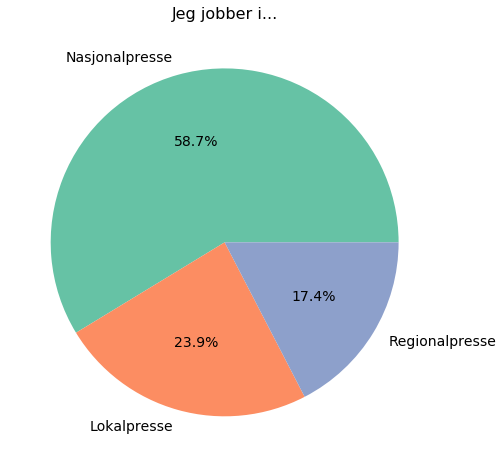

In [117]:
palette = sns.color_palette("Set2")
count1.plot.pie(figsize=(8, 8), label="", autopct="%1.1f%%", colors=palette)
plt.rcParams['font.size'] = 16
plt.title('Jeg jobber i...', fontsize=16, rotation=0)

plt.savefig('../figures/survey_1.png', bbox_inches='tight')
plt.show()

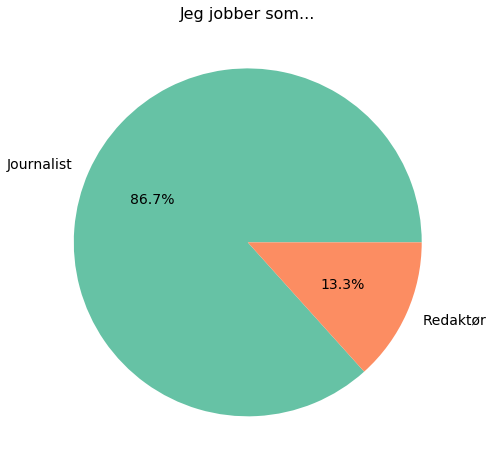

In [108]:
palette = sns.color_palette("Set2")
count2.plot.pie(figsize=(8, 8), label="", autopct="%1.1f%%", colors=palette)
plt.rcParams['font.size'] = 14
plt.title('Jeg jobber som...', fontsize=16, rotation=0)

plt.savefig('../figures/survey_2.png', bbox_inches='tight')
plt.show()

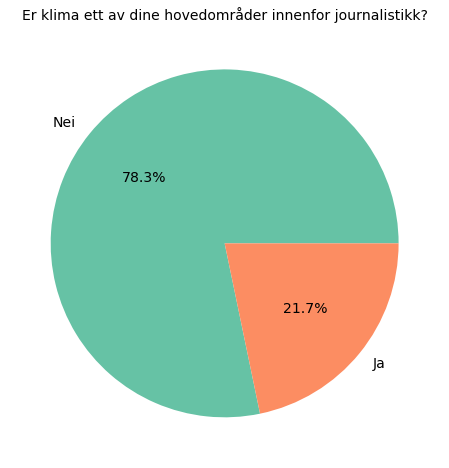

In [109]:
palette = sns.color_palette("Set2")
count3.plot.pie(figsize=(8, 8), label="", autopct="%1.1f%%", colors=palette)
plt.rcParams['font.size'] = 16
plt.title('Er klima ett av dine hovedområder innenfor journalistikk?', fontsize=14, rotation=0)

plt.savefig('../figures/survey_3.png', bbox_inches='tight')
plt.show()


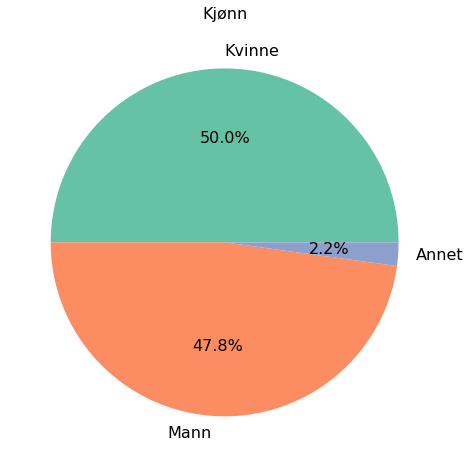

In [110]:
palette = sns.color_palette("Set2")
count4.plot.pie(figsize=(8, 8), label="", autopct="%1.1f%%", colors=palette)
plt.rcParams['font.size'] = 16
plt.title('Kjønn', fontsize=16, rotation=0)

plt.savefig('../figures/survey_4.png', bbox_inches='tight')
plt.show()

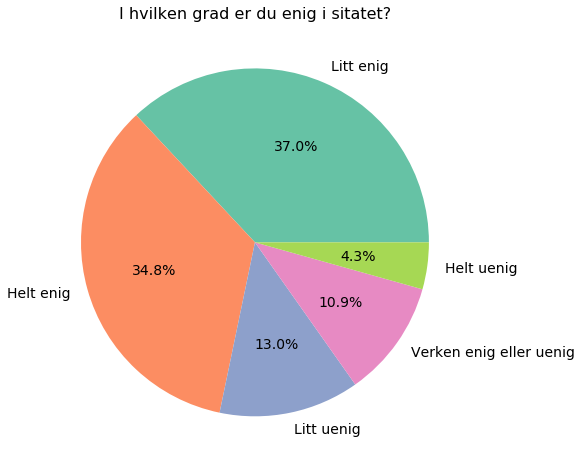

In [113]:
palette = sns.color_palette("Set2")
count5.plot.pie(figsize=(8, 8), label="", autopct="%1.1f%%", colors=palette)
plt.ylabel('', fontsize=14)
plt.rcParams['font.size'] = 14
plt.title('I hvilken grad er du enig i sitatet?', fontsize=16, rotation=0)

plt.savefig('../figures/survey_5.png', bbox_inches='tight')
plt.show()


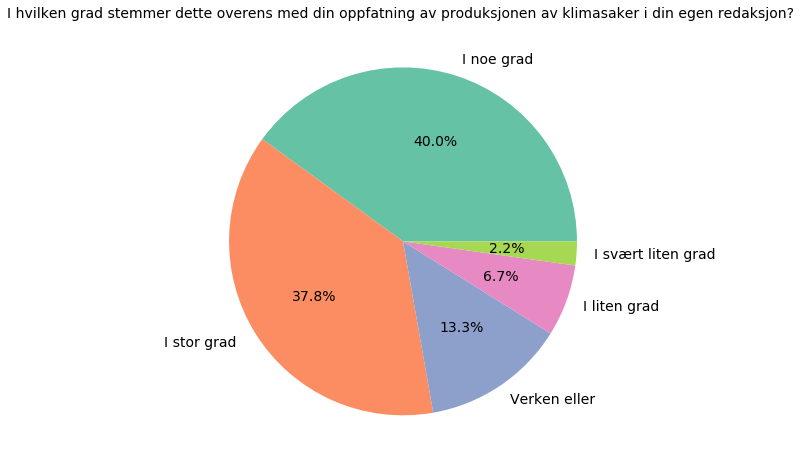

In [114]:
palette = sns.color_palette("Set2")
count6.plot.pie(figsize=(8, 8), label="", autopct="%1.1f%%", colors=palette)
plt.ylabel('', fontsize=14)
plt.rcParams['font.size'] = 14
plt.title('I hvilken grad stemmer dette overens med din oppfatning av produksjonen av klimasaker i din egen redaksjon? ', fontsize=14, rotation=0)

plt.savefig('../figures/survey_7.png', bbox_inches='tight')
plt.show()


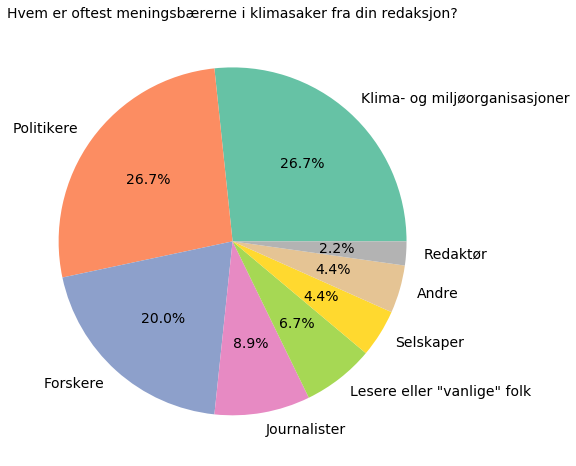

In [115]:
#changing one of the labels as it didn't process "" correctly
labels = count7.index.tolist()
labels[4] = 'Lesere eller "vanlige" folk'

#making the plot
palette = sns.color_palette("Set2")
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(count7, labels=labels, autopct="%1.1f%%", colors=palette)
ax.set_ylabel('', fontsize=14)
plt.title('Hvem er oftest meningsbærerne i klimasaker fra din redaksjon?', fontsize=14, rotation=0)

plt.savefig('../figures/survey_10.png', bbox_inches='tight')
plt.show()


In [52]:
labels = count7.index.tolist() 
print(labels)

['Klima- og miljøorganisasjoner', 'Politikere', 'Forskere', 'Journalister', 'Lesere eller &#34;vanlige&#34; folk', 'Selskaper', 'Andre', 'Redaktør']


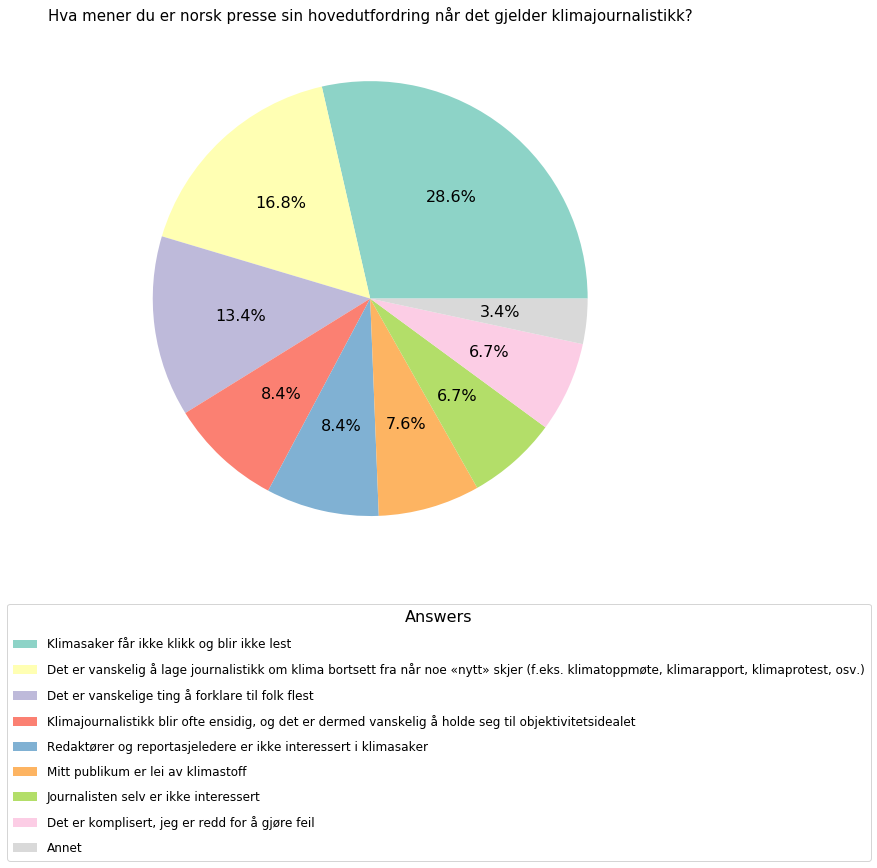

In [145]:
# Combining all the answers from question 8 into one pie chart
combined_answers = pd.concat([df['sp8_1'], df['sp8_2'], df['sp8_3'], 
                              df['sp8_4'], df['sp8_5'], df['sp8_6'], 
                              df['sp8_7'], df['sp8_8'], df['sp8_9']])

palette = sns.color_palette("Set3")
answer_counts = combined_answers.value_counts()

fig, ax = plt.subplots(figsize=(10, 10))
wedges, labels, _ = ax.pie(answer_counts, autopct="%1.1f%%", colors=palette)

# Creating a separate box for the labels as they are very long
legend_labels = answer_counts.index
plt.legend(wedges, legend_labels, loc="center left", bbox_to_anchor=(0.0, -0.1), prop={'size': 12}, title='Answers', 
           bbox_transform=plt.gcf().transFigure, labelspacing=1, borderpad=0.5)

plt.title('Hva mener du er norsk presse sin hovedutfordring når det gjelder klimajournalistikk?', fontsize=15, rotation=0)

plt.savefig('../figures/survey_8.png', bbox_inches='tight')
plt.show()


In [ ]:
!sudo apt-get install texlive-latex-extra

Password:

In [ ]:
sudo tlmgr install tcolorbox